In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib
# matplotlib.use('pgf')

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
     '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

markerlist = ['o', 4, 5, 6, 7, 'p', 'd', 'P', 3]


text_width = 5.5  # in  --> Confirmed with template explanation

fs_m1 = 4.5  # for figure ticks
fs = 7  # for regular figure text
fs_p1 = 8  # figure titles

axes_lw = 0.6

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('axes', linewidth=axes_lw)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})

matplotlib.rc('text', usetex=True)

plt.rcParams.update({'text.latex.preamble': r'\usepackage{amsmath}'})

# Test setup

# plt.figure(dpi=400, figsize=(text_width, text_width/3))
# plt.grid(0.3, zorder=0)
# for i in range(10):
#     plt.bar(i, i + 1, color=f'C{i}', zorder=2)
#     # ^ This zorder nonsense makes the grid  lines go behid the bars. I don't know why this is needed for barplots, but shouldn't usually be needed.
# # plt.title(r'\textbf{Test}, $\mathcal{C}, \mathbb{R}$')
# plt.xlabel('test $x$')
# plt.ylabel('test $y$')
# plt.show()

# Define errorfill


def errorfill(x, y, yerr, color=None, alpha_fill=0.3, line_alpha=1, ax=None,
              lw=1, linestyle='-', fill_linewidths=0.2,
              marker=None, markersize=1, label=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    plt_return = ax.plot(x, y, color=color, lw=lw, linestyle=linestyle, alpha=line_alpha, label=label, marker=marker, markersize=markersize)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill, linewidths=fill_linewidths)
    return plt_return


In [8]:
import pandas as pd

csv_1 = '/Users/shreyaspadhy/Desktop/loss.csv'

data = pd.read_csv(csv_1)

print(data)


     Method  logvar_eps_small  KL_eps_small  logvar_eps_high  KL_eps_high  \
0       NaN          7.269593      7.269593         9.210268     9.210268   
1       NaN          7.345380      7.074661         5.092650     9.320189   
2       NaN          8.362098      6.455176         3.444942     8.968962   
3       NaN          8.740908      6.209433         3.197970     8.679533   
4       NaN          8.377875      5.811353         2.767123     9.198372   
..      ...               ...           ...              ...          ...   
995     NaN          1.671010      2.392368         1.295425     4.867115   
996     NaN          1.732456      2.490800         1.391113     4.712319   
997     NaN          1.707572      2.372777         1.321651     4.674492   
998     NaN          1.657826      2.367349         1.422488     4.702502   
999     NaN          1.669214      2.370479         1.409954     4.648388   

     Unnamed: 5  Unnamed: 6  
0           NaN         NaN  
1           NaN

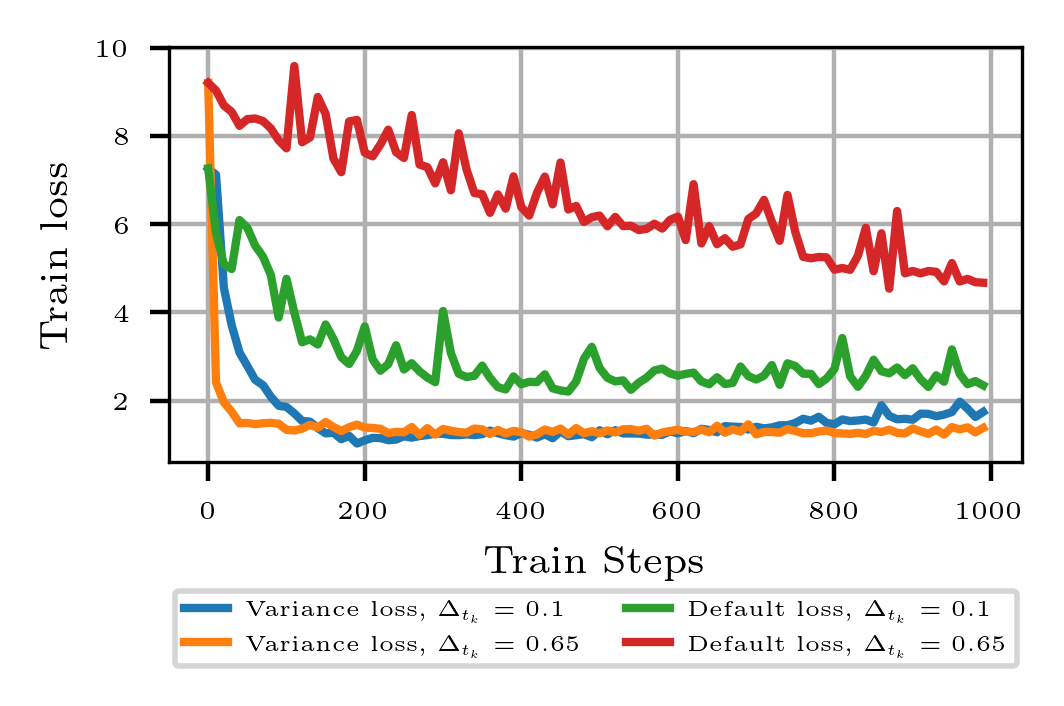

In [26]:
plt.figure(dpi=400, figsize=(text_width/2, text_width/4))
plt.grid(0.3, zorder=0)
plt.plot(data['logvar_eps_small'][::10], label=r'Variance loss, $\Delta_{t_k} = 0.1$')
plt.plot(data['logvar_eps_high'][::10], label=r'Variance loss, $\Delta_{t_k} = 0.65$')
plt.plot(data['KL_eps_small'][::10], label=r'Default loss, $\Delta_{t_k} = 0.1$')
plt.plot(data['KL_eps_high'][::10], label=r'Default loss, $\Delta_{t_k} = 0.65$')
plt.xlabel('Train Steps')
plt.ylabel('Train loss')

plt.legend(ncol=2, bbox_to_anchor=(0.5, -0.4), loc='center', frameon=True, fontsize=4)
plt.savefig('losses.pdf', bbox_inches='tight')
plt.show()